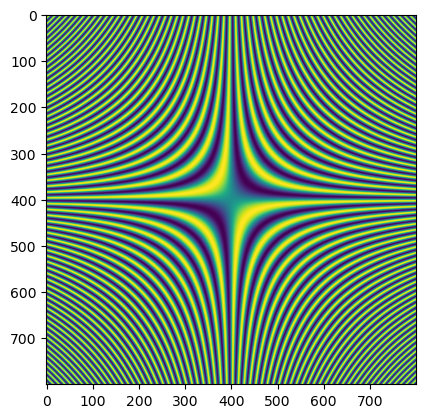

In [2]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
# transfer to the GPU device
x = x.to(device)
y = y.to(device)
# Compute Gaussian
frequency = 2  
sine_cosine = torch.sin(2 * np.pi * frequency * (x * y)) 
#plot
import matplotlib.pyplot as plt 
plt.imshow(sine_cosine.cpu().numpy())
plt.show()

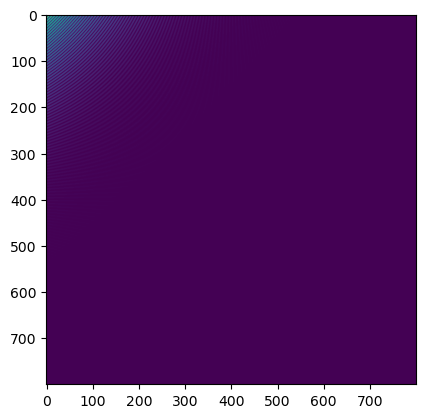

In [3]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian
frequency = 2 
sine_cosine = torch.sin(2 * np.pi * frequency * (x * y))  
gaussian = torch.exp(-(x*2 + y*2) / 2.0) *  torch.sin(2 * np.pi * frequency * (x * y))  
modulated_result = gaussian * sine_cosine
#plot
import matplotlib.pyplot as plt 
plt.imshow(modulated_result.cpu().numpy())
plt.show()

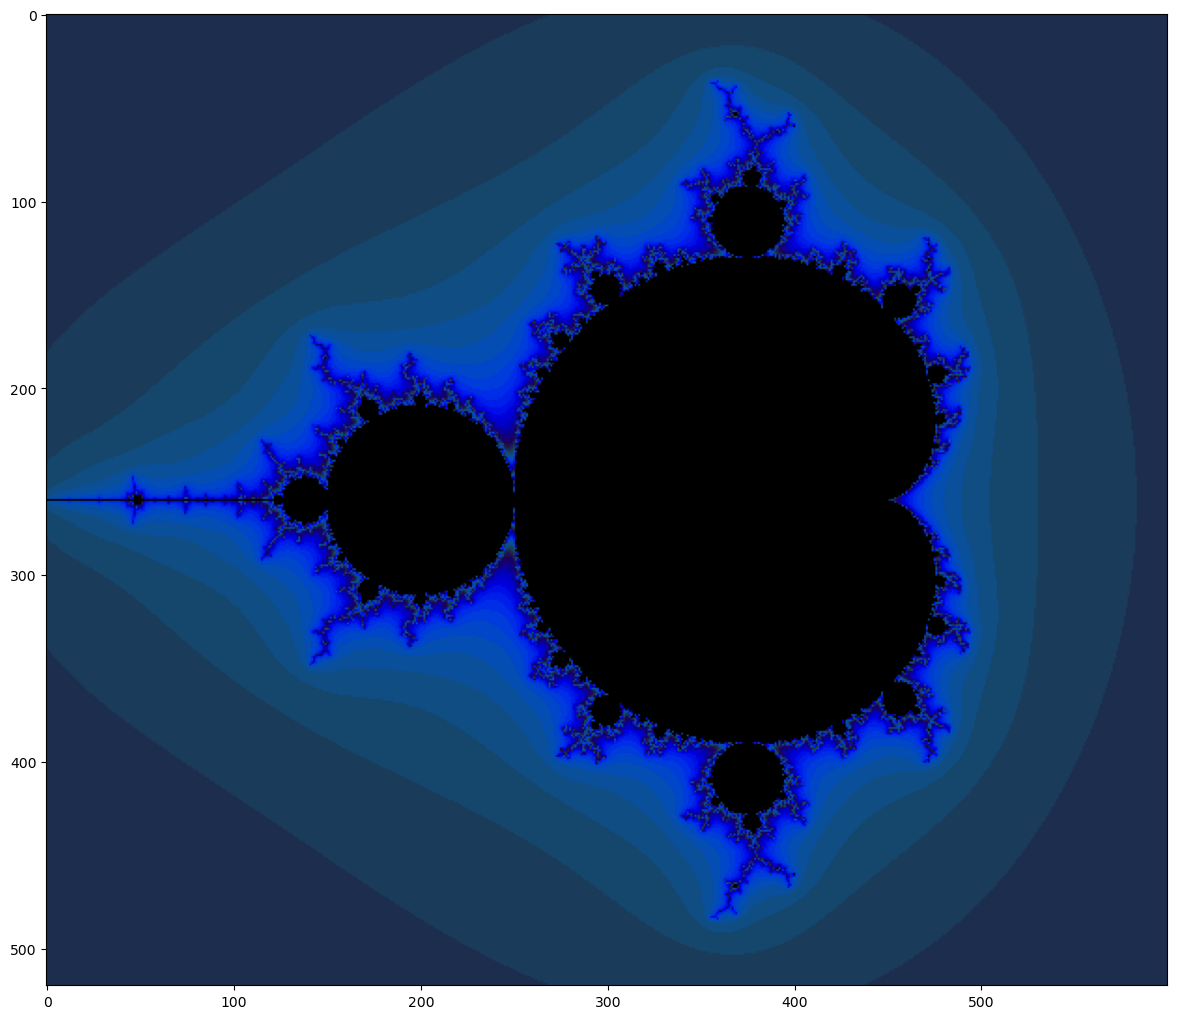

In [14]:
import torch
import numpy as np

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
#Mandelbrot Set
for i in range(200):
#Compute the new values of z: z^2 + x 
    zs_ = zs*zs + z
    not_diverged = torch.abs(zs_) < 4.0             
    #Update variables to compute
    ns += not_diverged
    zs = zs_
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
        a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
        img = np.concatenate([10+20*np.cos(a_cyclic),
        30+50*np.sin(a_cyclic),
        155-80*np.cos(a_cyclic)], 2)
        img[a==a.max()] = 0
        a = img
        a = np.uint8(np.clip(a, 0, 255))
        return a
plt.imshow(processFractal(ns.real.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

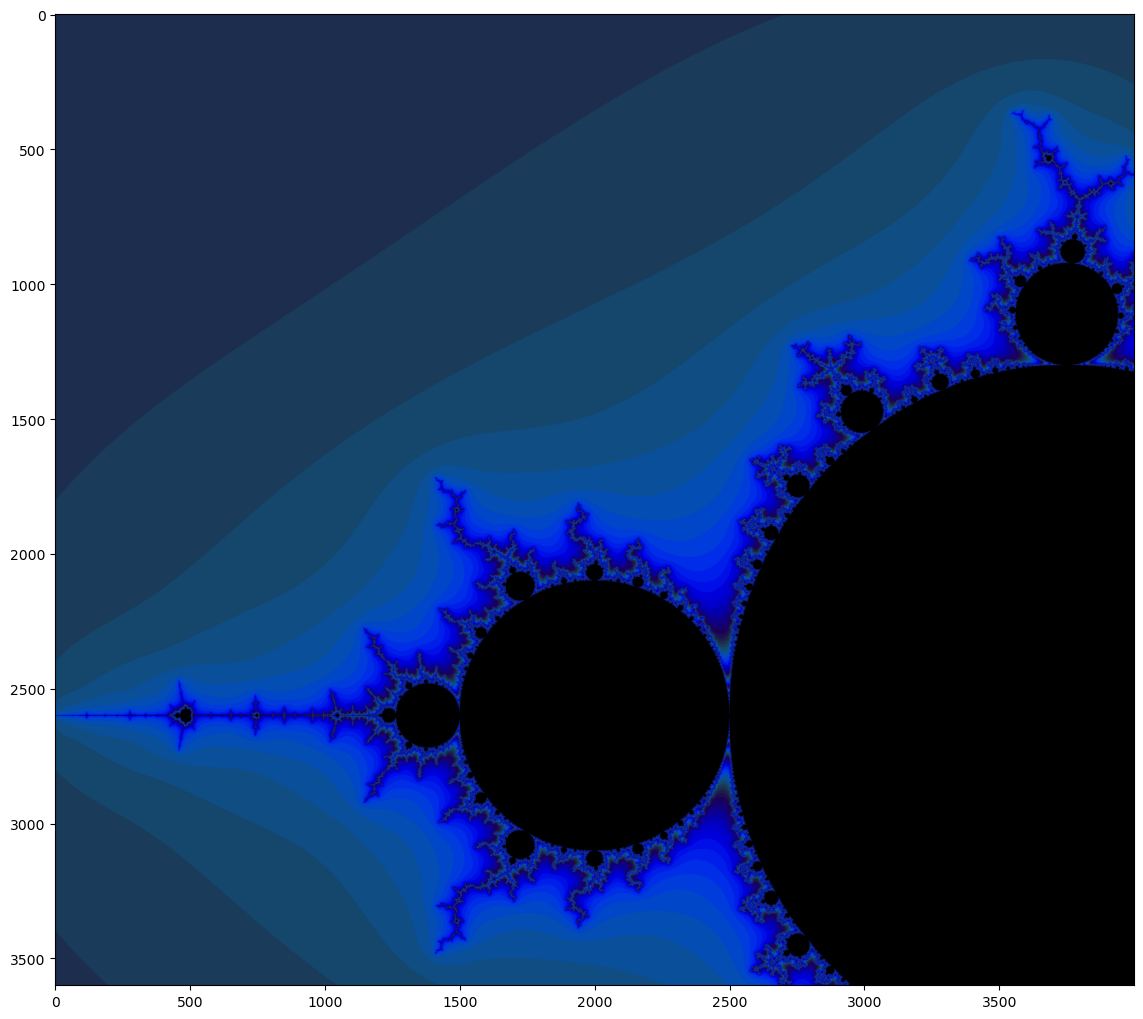

In [18]:
import torch
import numpy as np

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:0.5:0.0005, -2:0:0.0005]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 # transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
#Mandelbrot Set
for i in range(1000):
#Compute the new values of z: z^2 + x 
    zs_ = zs*zs + z
    not_diverged = torch.abs(zs_) < 4.0             
    #Update variables to compute
    ns += not_diverged
    zs = zs_
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
        a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
        img = np.concatenate([10+20*np.cos(a_cyclic),
        30+50*np.sin(a_cyclic),
        155-80*np.cos(a_cyclic)], 2)
        img[a==a.max()] = 0
        a = img
        a = np.uint8(np.clip(a, 0, 255))
        return a
plt.imshow(processFractal(ns.real.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

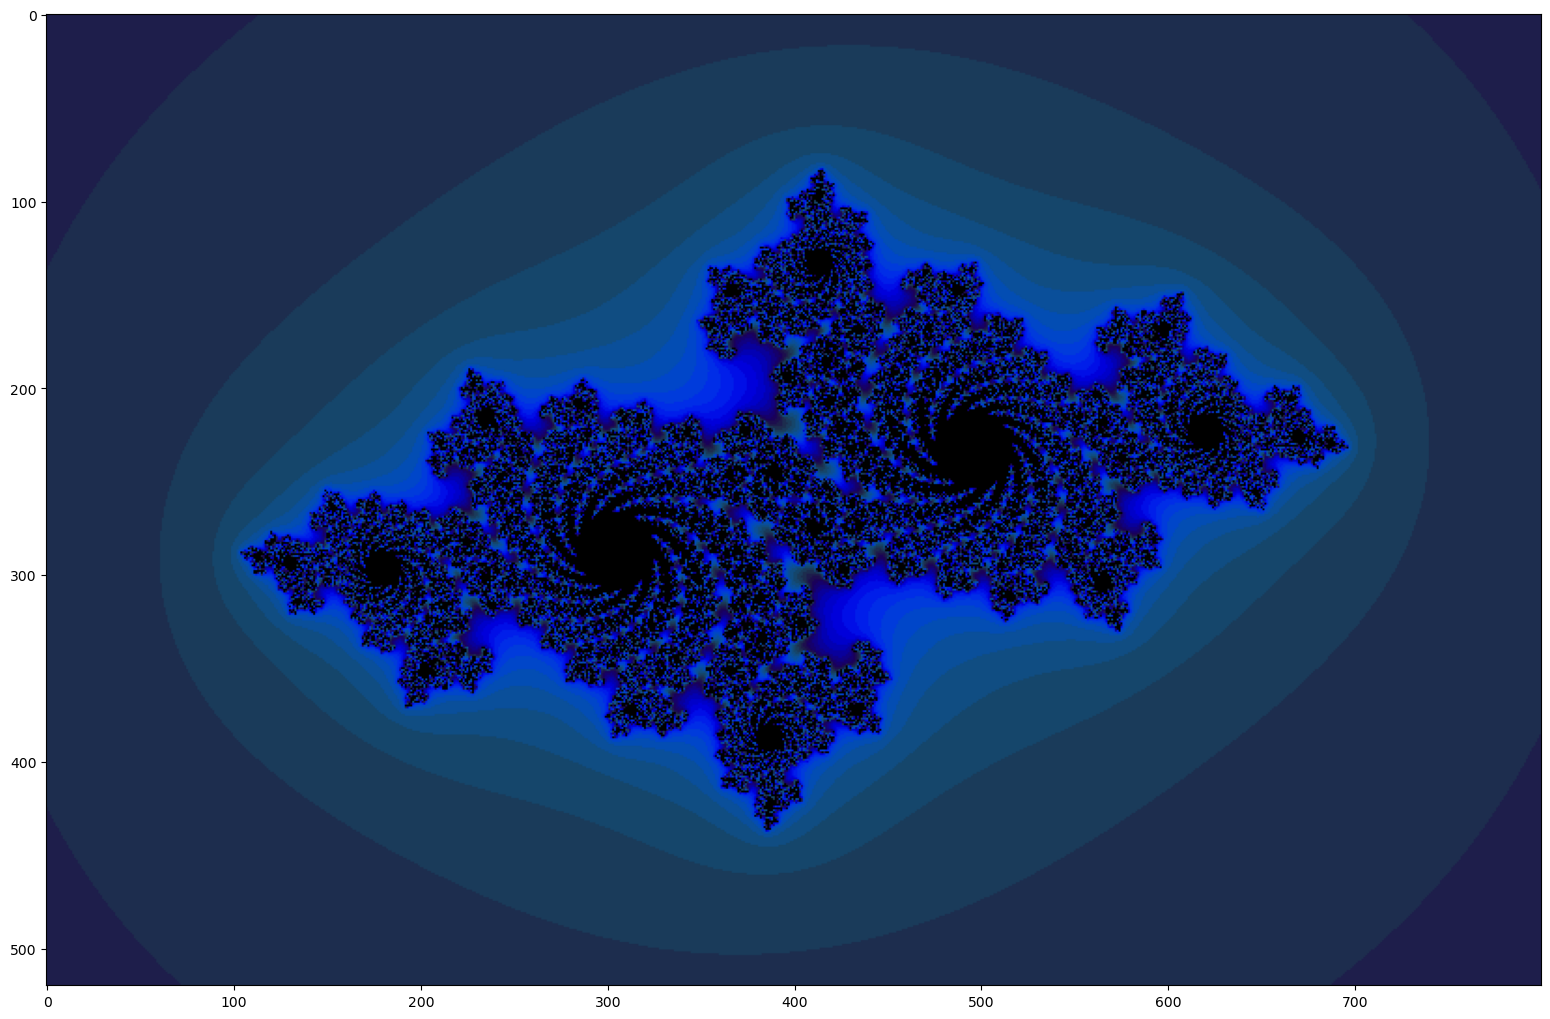

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:2:0.005]
# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)  # Important!
zs = z.clone()  # Updated!
ns = torch.zeros_like(z)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Define the complex constant 'c' for the Julia Set
c = torch.complex(torch.tensor(-0.7), torch.tensor(0.27015))

# Julia Set
for i in range(200):
    # Compute the new values of z: z^2 + c
    zs_ = zs * zs + c
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged
    zs = zs_

# Plot
fig = plt.figure(figsize=(16, 10))
def processFractal(a):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.real.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


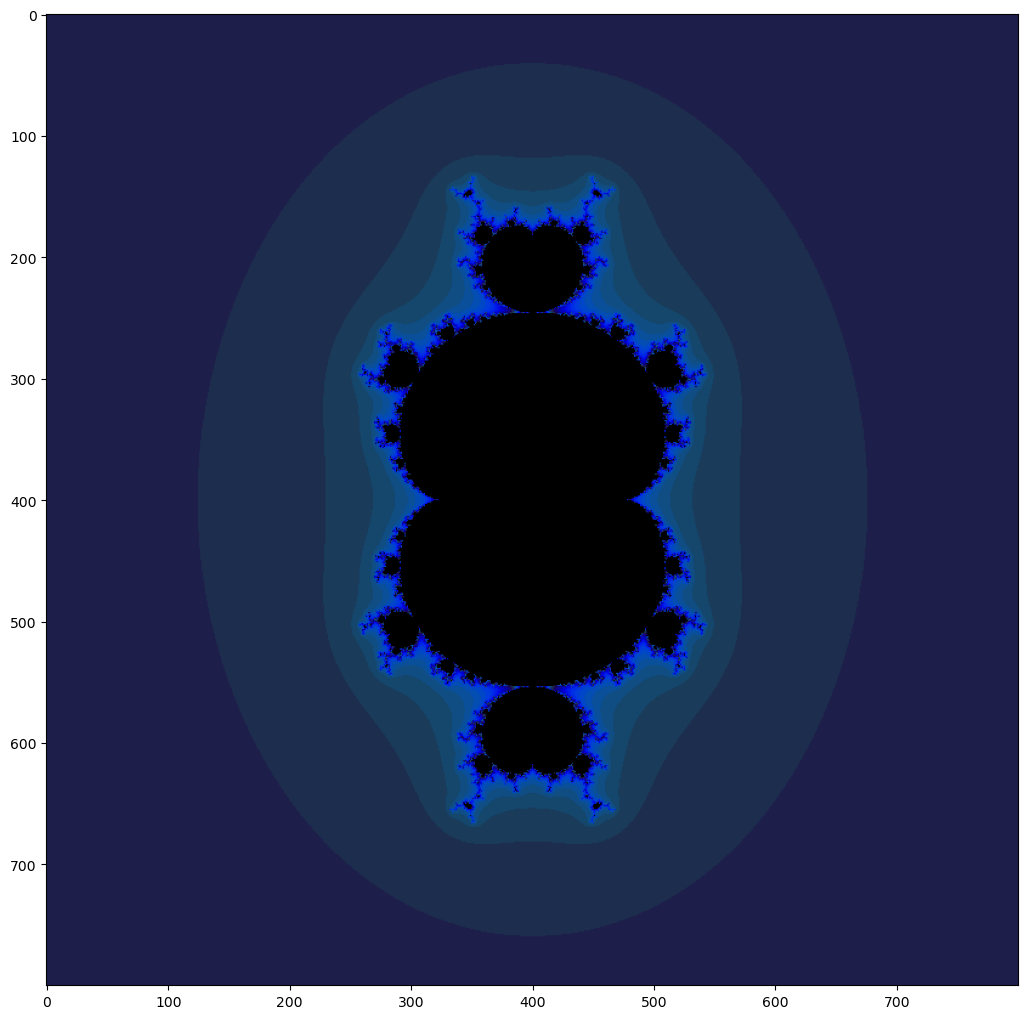

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D grid of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)

# Create tensors for calculations
z = z.to(device)
zs = z.clone()
ns = torch.zeros_like(z)

# Multibrot-3 Fractal
for i in range(200):
    # Compute the new values using the Multibrot-3 iteration formula
    zs_ = zs**3 + z
    # Check divergence
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_

# Plot the Multibrot-3 fractal
fig = plt.figure(figsize=(16, 10))
plt.imshow(processFractal(ns.real.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()